In [134]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI_Mumbai.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Mumbai_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.tail()

,Date,NO2,O3,PM2.5,PM10,SO2,RH,WD,WS,AQI5,AQI4,AQI3,AQI2,AQI1,DOW,DOM,DOY,MONTH,AQI
1216,06/04/2018,65.04,63.89,32.44,86.12,22.45,73.01,144.96,0.29,118.546897,78.289231,81.116154,81.060000,86.120000,5,6,96,4,98.065128
1217,07/04/2018,78.46,59.64,36.35,97.21,25.26,69.78,165.87,0.15,78.289231,81.116154,81.060000,86.120000,98.065128,6,7,97,4,103.970000
1218,08/04/2018,83.97,52.59,36.15,92.84,25.54,69.87,119.44,0.26,81.116154,81.060000,86.120000,98.065128,103.970000,7,8,98,4,122.640000
1219,09/04/2018,102.64,53.93,33.45,86.65,26.00,71.02,205.65,0.22,81.060000,86.120000,98.065128,103.970000,122.640000,1,9,99,4,126.290000
1220,10/04/2018,106.29,74.84,41.33,102.98,26.46,63.91,100.48,0.22,86.120000,98.065128,103.970000,122.640000,126.290000,2,10,100,4,98.280000


In [188]:
#create a dataframe with all training data except the target column
# train_X = train_df.drop(columns=['AQI', 'Date', 'SO2', 'NO2', 'O3'])
# test_X = test_df.drop(columns=['AQI', 'Date', 'SO2', 'NO2', 'O3'])
train_X = train_df.drop(columns=['AQI', 'Date'])
test_X = test_df.drop(columns=['AQI', 'Date'])
#check that the target variable has been removed
train_X.head() 


,NO2,O3,PM2.5,PM10,SO2,RH,WD,WS,AQI5,AQI4,AQI3,AQI2,AQI1,DOW,DOM,DOY,MONTH
0,46.94,8.88,75.40,173.80,15.52,70.12,140.56,0.38,143.676309,155.396846,148.407047,151.935168,150.158621,7,7,341,12
1,45.53,17.94,71.63,155.24,21.78,99.88,150.76,0.22,155.396846,148.407047,151.935168,150.158621,137.288621,1,8,342,12
2,42.39,47.08,75.08,164.03,18.98,90.86,127.07,0.32,148.407047,151.935168,150.158621,137.288621,149.066207,2,9,343,12
3,54.66,34.89,86.68,200.99,22.56,89.55,153.23,0.19,151.935168,150.158621,137.288621,149.066207,188.666207,3,10,344,12
4,248.17,49.13,99.88,205.55,32.32,73.62,113.71,0.22,150.158621,137.288621,149.066207,188.666207,268.170000,4,11,345,12


In [189]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]



#view dataframe
train_y.tail()

,AQI
1216,98.065128
1217,103.970000
1218,122.640000
1219,126.290000
1220,98.280000


In [190]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))

In [191]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [192]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1221/1221 [==============================] - 1s 936us/step - loss: 3346.9281
Epoch 2/300
1221/1221 [==============================] - 0s 58us/step - loss: 2876.6978
Epoch 3/300
1221/1221 [==============================] - 0s 57us/step - loss: 2616.9779
Epoch 4/300
1221/1221 [==============================] - 0s 58us/step - loss: 2468.1732
Epoch 5/300
1221/1221 [==============================] - 0s 60us/step - loss: 2345.8585
Epoch 6/300
1221/1221 [==============================] - 0s 55us/step - loss: 2292.4030
Epoch 7/300
1221/1221 [==============================] - 0s 55us/step - loss: 2263.0106
Epoch 8/300
1221/1221 [==============================] - 0s 54us/step - loss: 2196.8351
Epoch 9/300
1221/1221 [==============================] - 0s 57us/step - loss: 2155.8732
Epoch 10/300
1221/1221 [==============================] - 0s 63us/step - loss: 2139.5394
Epoch 11/300
1221/1221 [==============================] - 0s 65us/step - loss: 2131.0519
Epoch 12/300
1221/1221 [=====

1221/1221 [==============================] - 0s 49us/step - loss: 1838.5126
Epoch 94/300
1221/1221 [==============================] - 0s 44us/step - loss: 1819.8002
Epoch 95/300
1221/1221 [==============================] - 0s 43us/step - loss: 1819.1943
Epoch 96/300
1221/1221 [==============================] - 0s 43us/step - loss: 1889.3066
Epoch 97/300
1221/1221 [==============================] - 0s 52us/step - loss: 1876.4007
Epoch 98/300
1221/1221 [==============================] - 0s 42us/step - loss: 1808.5024
Epoch 99/300
1221/1221 [==============================] - 0s 46us/step - loss: 1828.9616
Epoch 100/300
1221/1221 [==============================] - 0s 42us/step - loss: 1819.3671
Epoch 101/300
1221/1221 [==============================] - 0s 56us/step - loss: 1803.9489
Epoch 102/300
1221/1221 [==============================] - 0s 56us/step - loss: 1806.0384
Epoch 103/300
1221/1221 [==============================] - 0s 69us/step - loss: 1799.7259
Epoch 104/300
1221/1221 [=====

1221/1221 [==============================] - 0s 96us/step - loss: 1728.5545
Epoch 185/300
1221/1221 [==============================] - 0s 74us/step - loss: 1719.0197
Epoch 186/300
1221/1221 [==============================] - 0s 81us/step - loss: 1719.5598
Epoch 187/300
1221/1221 [==============================] - 0s 61us/step - loss: 1725.3714
Epoch 188/300
1221/1221 [==============================] - 0s 75us/step - loss: 1722.4662
Epoch 189/300
1221/1221 [==============================] - 0s 89us/step - loss: 1730.0600
Epoch 190/300
1221/1221 [==============================] - 0s 85us/step - loss: 1728.3436
Epoch 191/300
1221/1221 [==============================] - 0s 85us/step - loss: 1716.2068
Epoch 192/300
1221/1221 [==============================] - 0s 84us/step - loss: 1752.8099
Epoch 193/300
1221/1221 [==============================] - 0s 93us/step - loss: 1722.0195
Epoch 194/300
1221/1221 [==============================] - 0s 113us/step - loss: 1724.7061
Epoch 195/300
1221/1221

1221/1221 [==============================] - 0s 60us/step - loss: 1653.1945
Epoch 276/300
1221/1221 [==============================] - 0s 72us/step - loss: 1651.9241
Epoch 277/300
1221/1221 [==============================] - 0s 61us/step - loss: 1652.5785
Epoch 278/300
1221/1221 [==============================] - 0s 65us/step - loss: 1658.9019
Epoch 279/300
1221/1221 [==============================] - 0s 72us/step - loss: 1649.0981
Epoch 280/300
1221/1221 [==============================] - 0s 69us/step - loss: 1659.8521
Epoch 281/300
1221/1221 [==============================] - 0s 66us/step - loss: 1659.9045
Epoch 282/300
1221/1221 [==============================] - 0s 90us/step - loss: 1656.6993
Epoch 283/300
1221/1221 [==============================] - 0s 58us/step - loss: 1643.8567
Epoch 284/300
1221/1221 [==============================] - 0s 46us/step - loss: 1636.7639
Epoch 285/300
1221/1221 [==============================] - 0s 44us/step - loss: 1638.7742
Epoch 286/300
1221/1221 

In [193]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(test_X)

In [194]:
l = []
for i in range(10):
    l.append((test_y["AQI"][i] - test_y_predictions[i]))
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

97.66307692307691 [116.50469] [-18.841614]
85.59 [122.37441] [-36.784416]
76.99 [105.55117] [-28.561172]
79.87 [97.9628] [-18.092796]
81.21 [101.55309] [-20.343094]
88.32 [93.617256] [-5.2972565]
93.77 [101.03286] [-7.262863]
75.47 [111.6002] [-36.130196]
105.431744966443 [92.92702] [12.50473]
91.68256410256409 [120.8609] [-29.178337]


In [195]:
l.sort(reverse = True) 
print(l)

[array([12.50473], dtype=float32), array([-5.2972565], dtype=float32), array([-7.262863], dtype=float32), array([-18.092796], dtype=float32), array([-18.841614], dtype=float32), array([-20.343094], dtype=float32), array([-28.561172], dtype=float32), array([-29.178337], dtype=float32), array([-36.130196], dtype=float32), array([-36.784416], dtype=float32)]


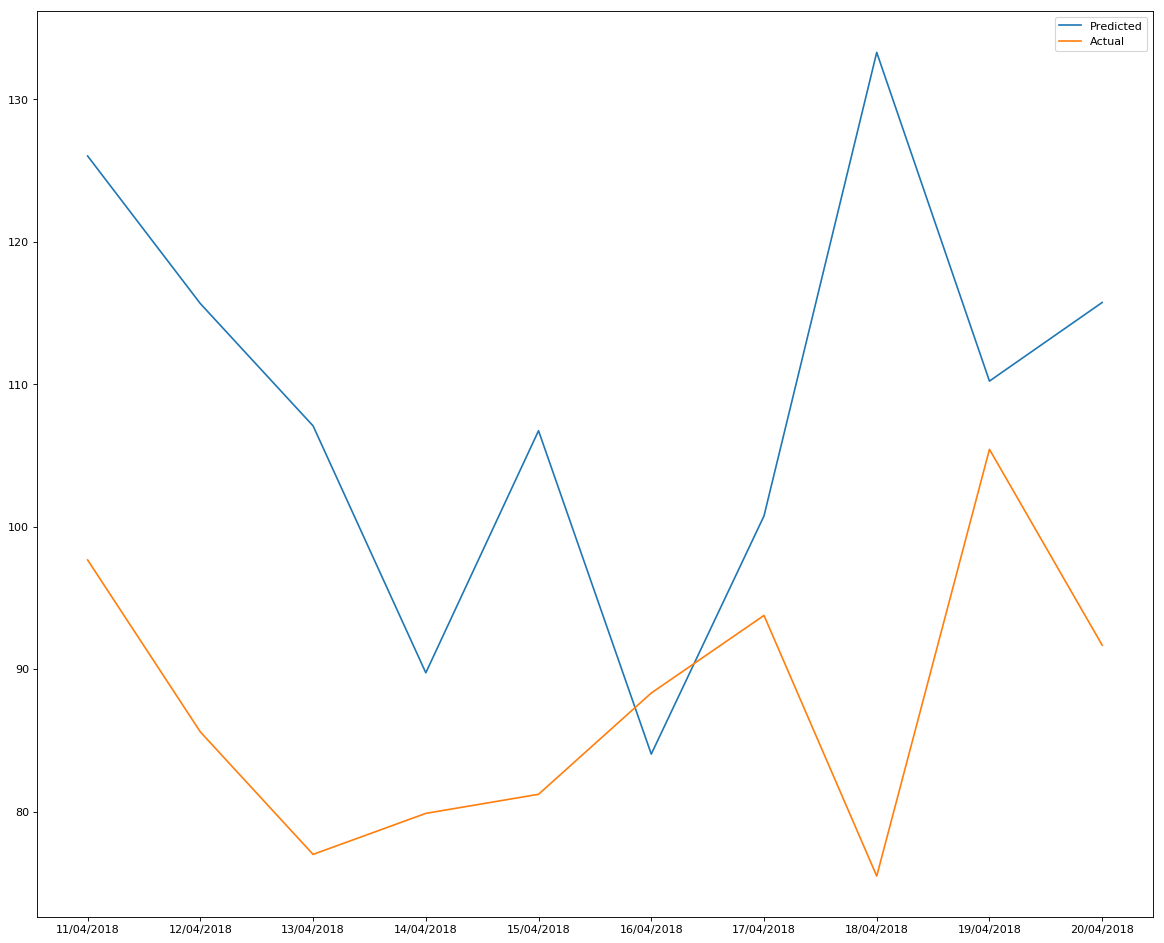

In [172]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [163]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(20, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(20, activation='relu'))
model_mc.add(Dense(20, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1221/1221 [==============================] - 1s 1ms/step - loss: 16913.4608
Epoch 2/300
1221/1221 [==============================] - 0s 61us/step - loss: 5239.3125
Epoch 3/300
1221/1221 [==============================] - 0s 60us/step - loss: 2832.2047
Epoch 4/300
1221/1221 [==============================] - 0s 62us/step - loss: 2352.4205
Epoch 5/300
1221/1221 [==============================] - 0s 61us/step - loss: 2194.2030
Epoch 6/300
1221/1221 [==============================] - 0s 57us/step - loss: 2143.5080
Epoch 7/300
1221/1221 [==============================] - 0s 65us/step - loss: 2119.3009
Epoch 8/300
1221/1221 [==============================] - 0s 63us/step - loss: 2120.0164
Epoch 9/300
1221/1221 [==============================] - 0s 65us/step - loss: 2073.5094
Epoch 10/300
1221/1221 [==============================] - 0s 64us/step - loss: 2081.6045
Epoch 11/300
1221/1221 [==============================] - 0s 67us/step - loss: 2079.5955
Epoch 12/300
1221/1221 [======

1221/1221 [==============================] - 0s 71us/step - loss: 1653.5545
Epoch 94/300
1221/1221 [==============================] - 0s 60us/step - loss: 1678.1374
Epoch 95/300
1221/1221 [==============================] - 0s 61us/step - loss: 1640.5933
Epoch 96/300
1221/1221 [==============================] - 0s 59us/step - loss: 1640.4560
Epoch 97/300
1221/1221 [==============================] - 0s 62us/step - loss: 1659.8287
Epoch 98/300
1221/1221 [==============================] - 0s 62us/step - loss: 1644.3745
Epoch 99/300
1221/1221 [==============================] - 0s 64us/step - loss: 1646.9541
Epoch 100/300
1221/1221 [==============================] - 0s 56us/step - loss: 1622.3432
Epoch 101/300
1221/1221 [==============================] - 0s 56us/step - loss: 1636.3926
Epoch 102/300
1221/1221 [==============================] - 0s 45us/step - loss: 1632.0257
Epoch 103/300
1221/1221 [==============================] - 0s 53us/step - loss: 1606.1896
Epoch 104/300
1221/1221 [=====

1221/1221 [==============================] - 0s 60us/step - loss: 1367.6593
Epoch 185/300
1221/1221 [==============================] - 0s 60us/step - loss: 1349.9288
Epoch 186/300
1221/1221 [==============================] - 0s 56us/step - loss: 1365.8117
Epoch 187/300
1221/1221 [==============================] - 0s 63us/step - loss: 1316.2541
Epoch 188/300
1221/1221 [==============================] - 0s 58us/step - loss: 1367.8288
Epoch 189/300
1221/1221 [==============================] - 0s 59us/step - loss: 1309.5022
Epoch 190/300
1221/1221 [==============================] - 0s 61us/step - loss: 1331.8872
Epoch 191/300
1221/1221 [==============================] - 0s 63us/step - loss: 1323.7396
Epoch 192/300
1221/1221 [==============================] - 0s 61us/step - loss: 1326.4554
Epoch 193/300
1221/1221 [==============================] - 0s 58us/step - loss: 1334.1365
Epoch 194/300
1221/1221 [==============================] - 0s 56us/step - loss: 1367.5828
Epoch 195/300
1221/1221 

1221/1221 [==============================] - 0s 68us/step - loss: 1202.8598
Epoch 276/300
1221/1221 [==============================] - 0s 57us/step - loss: 1167.3202
Epoch 277/300
1221/1221 [==============================] - 0s 58us/step - loss: 1176.1381
Epoch 278/300
1221/1221 [==============================] - 0s 60us/step - loss: 1161.2639
Epoch 279/300
1221/1221 [==============================] - 0s 58us/step - loss: 1138.2654
Epoch 280/300
1221/1221 [==============================] - 0s 62us/step - loss: 1116.5310
Epoch 281/300
1221/1221 [==============================] - 0s 60us/step - loss: 1140.7771
Epoch 282/300
1221/1221 [==============================] - 0s 60us/step - loss: 1132.5829
Epoch 283/300
1221/1221 [==============================] - 0s 61us/step - loss: 1153.3148
Epoch 284/300
1221/1221 [==============================] - 0s 65us/step - loss: 1145.1885
Epoch 285/300
1221/1221 [==============================] - 0s 60us/step - loss: 1160.6332
Epoch 286/300
1221/1221 

In [164]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model_mc.predict(test_X)

In [165]:
l = []
for i in range(10):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

97.66307692307691 [113.88017] [-16.605143]
85.59 [128.1144] [-49.68384]
76.99 [104.76268] [-36.073105]
79.87 [97.07934] [-21.54668]
81.21 [134.03365] [-65.045746]
88.32 [127.18158] [-44.00088]
93.77 [100.36928] [-7.037732]
75.47 [132.94997] [-76.16267]
105.431744966443 [109.07144] [-3.4521804]
91.68256410256409 [154.72166] [-68.758]


In [166]:
l.sort(reverse = True) 
print(l)

[array([-3.4521804], dtype=float32), array([-7.037732], dtype=float32), array([-16.605143], dtype=float32), array([-21.54668], dtype=float32), array([-36.073105], dtype=float32), array([-44.00088], dtype=float32), array([-49.68384], dtype=float32), array([-65.045746], dtype=float32), array([-68.758], dtype=float32), array([-76.16267], dtype=float32)]


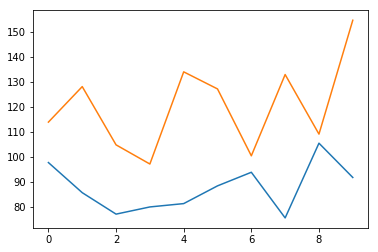

In [167]:
import matplotlib.pyplot as plt
import numpy as np
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(i)
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])

plt.plot(datelist, actuallist)
plt.plot(datelist, predictionlist)
plt.show()